# Test 1

In [ ]:
# python version
import sys

print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)


Python version
3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=9, micro=21, releaselevel='final', serial=0)


In [ ]:
# check F2S package
import importlib.metadata
print(importlib.metadata.version('Flow2Spatial'))

import Flow2Spatial as F2S
F2S.model
F2S.model.reconstruction

0.1.12


<function Flow2Spatial.model.utils.reconstruction(select_epoch, channel_intensity, out_adata='adata', DNN_para=[12, 10, 8], dir_run='./save_environ')>

In [30]:
# ERROR
import Flow2Spatial as F2S
import pandas as pd
## Read protein abundance table
channel_intensity_list_dat = pd.read_csv('./df_pro_gut.csv')
channel_intensity_list_dat.loc[channel_intensity_list_dat['PG.Genes'].isna(), 'PG.Genes'] = channel_intensity_list_dat.loc[channel_intensity_list_dat['PG.Genes'].isna(), 'PG.ProteinAccessions'] + '_gene'
channel_intensity_list_dat_dropna = channel_intensity_list_dat.dropna()

## Prediction
Reconstruction = F2S.model.reconstruction(channel_intensity_list_dat_dropna, DNN_model='./Recontruct_weights_gut.pkl', Xchannels=57, mask='./mask')

TypeError: reconstruction() got an unexpected keyword argument 'DNN_model'

In [ ]:
# check channel data (PG matrix)
import Flow2Spatial as F2S
import pandas as pd

## Read protein abundance table
channel_intensity_list_dat = pd.read_csv('./df_pro_gut.csv')
channel_intensity_list_dat.loc[channel_intensity_list_dat['PG.Genes'].isna(), 'PG.Genes'] = channel_intensity_list_dat.loc[channel_intensity_list_dat['PG.Genes'].isna(), 'PG.ProteinAccessions'] + '_gene'
channel_intensity_list_dat_dropna = channel_intensity_list_dat.dropna()

## Prediction
F2S.model.reconstruction
# Reconstruction = F2S.model.reconstruction(channel_intensity_list_dat_dropna, DNN_model='./Recontruct_weights_gut.pkl', Xchannels=57, mask='./mask')


<function Flow2Spatial.model.utils.reconstruction(select_epoch, channel_intensity, out_adata='adata', DNN_para=[12, 10, 8], dir_run='./save_environ')>

In [ ]:
# check weights.pkl
import torch

model_path = './Recontruct_weights_gut.pkl'
model_state_dict = torch.load(model_path, map_location='cpu')  # or 'cuda' if you use GPU
model_state_dict

OrderedDict([('conv1.weight',
              tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
                          3.0660e-02,  2.5398e-02],
                        [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
                          2.9754e-02,  4.1735e-02],
                        [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
                         -1.1601e-01, -1.2191e-01],
                        ...,
                        [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
                          2.4631e-03,  1.6726e-02],
                        [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
                          7.3973e-02,  5.9085e-02],
                        [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
                          8.3749e-02,  9.6970e-02]],
              
                       [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
                          2.5483

In [ ]:
## Prediction
# Reconstruction = F2S.model.reconstruction(channel_intensity_list_dat_dropna, DNN_model='./Recontruct_weights_gut.pkl', Xchannels=57, mask='./mask')
Reconstruction = F2S.model.reconstruction(select_epoch = './Recontruct_weights_gut.pkl', channel_intensity = channel_intensity_list_dat_dropna)


In [ ]:
from anndata import read_h5ad
adata = read_h5ad('./Gut_reference.h5ad')
import pickle
with open('./mask', 'rb') as handle:
    mask = pickle.load(handle)
segments = F2S.transfer_masks(adata, mask, list_s=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5', 'Cluster6', 'Cluster7', 'Cluster8', 'Cluster9'])



NameError: name 'F2S' is not defined

# Test 2

In [ ]:
# transfer masks
from anndata import read_h5ad
adata = read_h5ad('./Gut_reference.h5ad')

import pickle
with open('./mask', 'rb') as handle:
    mask = pickle.load(handle)

import Flow2Spatial as F2S
segments = F2S.transfer_masks(adata, mask, list_s=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5', 'Cluster6', 'Cluster7', 'Cluster8', 'Cluster9'])


# ## check adata
# type(adata)
# adata.X.shape # (2093, 994);            main data matrix (e.g., expression values; shape = cells/spots × genes)
# adata.obs.shape # (2093, 11);           metadata for rows (e.g., spatial spots or cell annotations)
# adata.var.shape # (994, 1);             metadata for columns (e.g., gene names)
# adata.uns # OrderedDict();              unstructured metadata (e.g., color maps, method parameters)
# adata.obsm.to_df().shape # (2093, 2);   multidimensional row annotations (e.g., spatial coordinates)
# adata.layers # Layers with keys;        alternative representations of .X (e.g., raw, normalized)
# adata.raw # None;                       unprocessed version of .X, often used for reference


# ## check mask
# mask.shape # (70, 70)
# import collections
# collections.Counter(mask.flatten()) # Counter({np.False_: 2807, np.True_: 2093})
# # Create a heatmap
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(8, 8))
# sns.heatmap(mask, cmap='Greys', cbar=False, square=True)
# plt.title('Binary Mask Heatmap (70x70)')
# plt.xlabel('X-axis (Columns)')
# plt.ylabel('Y-axis (Rows)')
# plt.tight_layout()
# plt.show()


# ## check segments
# import numpy as np
# a = np.array(segments)
# print(a.shape) # (9, 70, 70)
# import collections
# collections.Counter(a.flatten())
# # Counter({np.str_('0'): 25263,
# #          np.str_('2'): 3253,
# #          np.str_('3'): 2707,
# #          np.str_('1'): 4070,
# #          np.str_('4'): 2321,
# #          np.str_('5'): 1736,
# #          np.str_('6'): 962,
# #          np.str_('7'): 1209,
# #          np.str_('8'): 635,
# #          np.str_('11'): 380,
# #          np.str_('10'): 301,
# #          np.str_('9'): 384,
# #          np.str_('12'): 291,
# #          np.str_('14'): 192,
# #          np.str_('13'): 117,
# #          np.str_('17'): 31,
# #          np.str_('15'): 65,
# #          np.str_('19'): 118,
# #          np.str_('18'): 15,
# #          np.str_('16'): 50})

F2S.generator.omics(adata, mask, dir_run='./save_environ')



c:\Users\dell\anaconda3\envs\PLATO\lib\site-packages\Flow2Spatial\main.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  transfer[xy_index['y'][index], xy_index['x'][index]] = xy_index[seg_index][index]
c:\Users\dell\anaconda3\envs\PLATO\lib\site-packages\Flow2Spatial\main.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  transfer[xy_index['y'][index], xy_index['x'][index]] = xy_index[seg_index][index]
c:\Users\dell\anaconda3\envs\PLATO\lib\site-packages\Flow2Spatial\main.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

'Omics data done'

# EOF

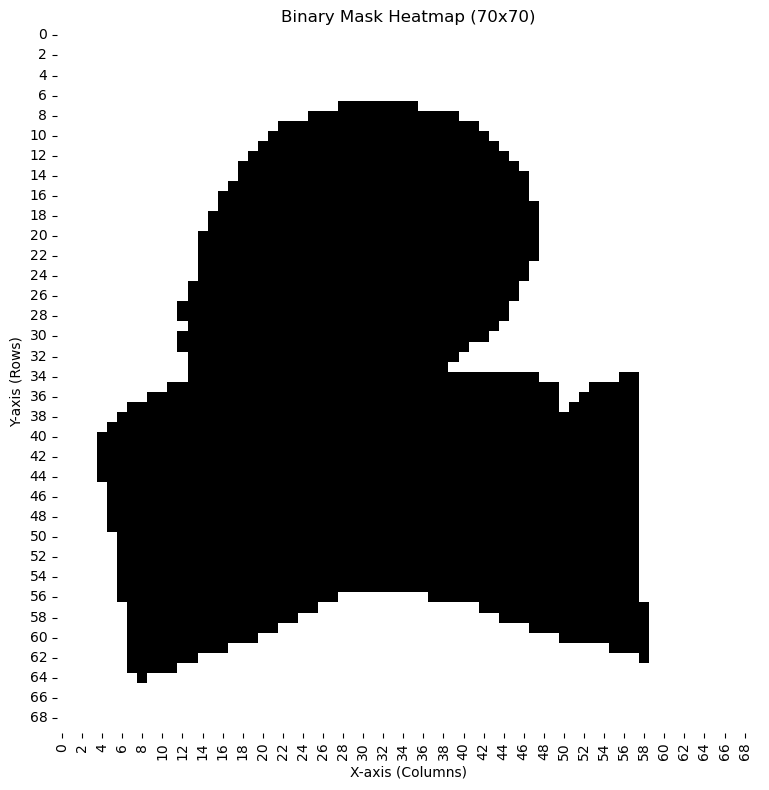

In [101]:
adata.X.A[:, 1]
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(mask, cmap='Greys', cbar=False, square=True)
plt.title('Binary Mask Heatmap (70x70)')
plt.xlabel('X-axis (Columns)')
plt.ylabel('Y-axis (Rows)')
plt.tight_layout()
plt.show()

In [ ]:
def transfer_mask_rw(value, mask, point_row, point_col):
    transfer = np.zeros(mask.shape) # masked values will be zeros
    for index in range(len(point_row)):
        transfer[point_row[index], point_col[index]] = value[index]
    
    return(transfer.flatten())

adata_xa = adata.X.A # shorthand for .toarray() — sparse matrix to dense NumPy array
point_row, point_col = np.where(mask) # return two ndarrays about coordinates

out_list_transfer = []
for n in range(adata.X.shape[1]):
    tmp = transfer_mask_rw(adata_xa[:,1], mask, point_row, point_col)
    out_list_transfer.append(tmp)
transfer_array = np.array(out_list_transfer)

transfer_array.shape # (994, 4900)
adata_xa.shape # (2093, 994)
mask.shape # (70, 70)
len(adata_xa[:,1]) # 2093
len(point_col) # 2093

In [ ]:
transfer_array.shape # (994, 4900)
adata_xa.shape # (2093, 994)
mask.shape # (70, 70)
len(adata_xa[:,1]) # 2093
len(point_col) # 2093

2093

C:\Users\dell\AppData\Local\Temp\ipykernel_38436\861285169.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = cm.get_cmap('tab20', n_clusters)  # or 'tab20b', 'Set3', 'gist_ncar'
C:\Users\dell\AppData\Local\Temp\ipykernel_38436\861285169.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


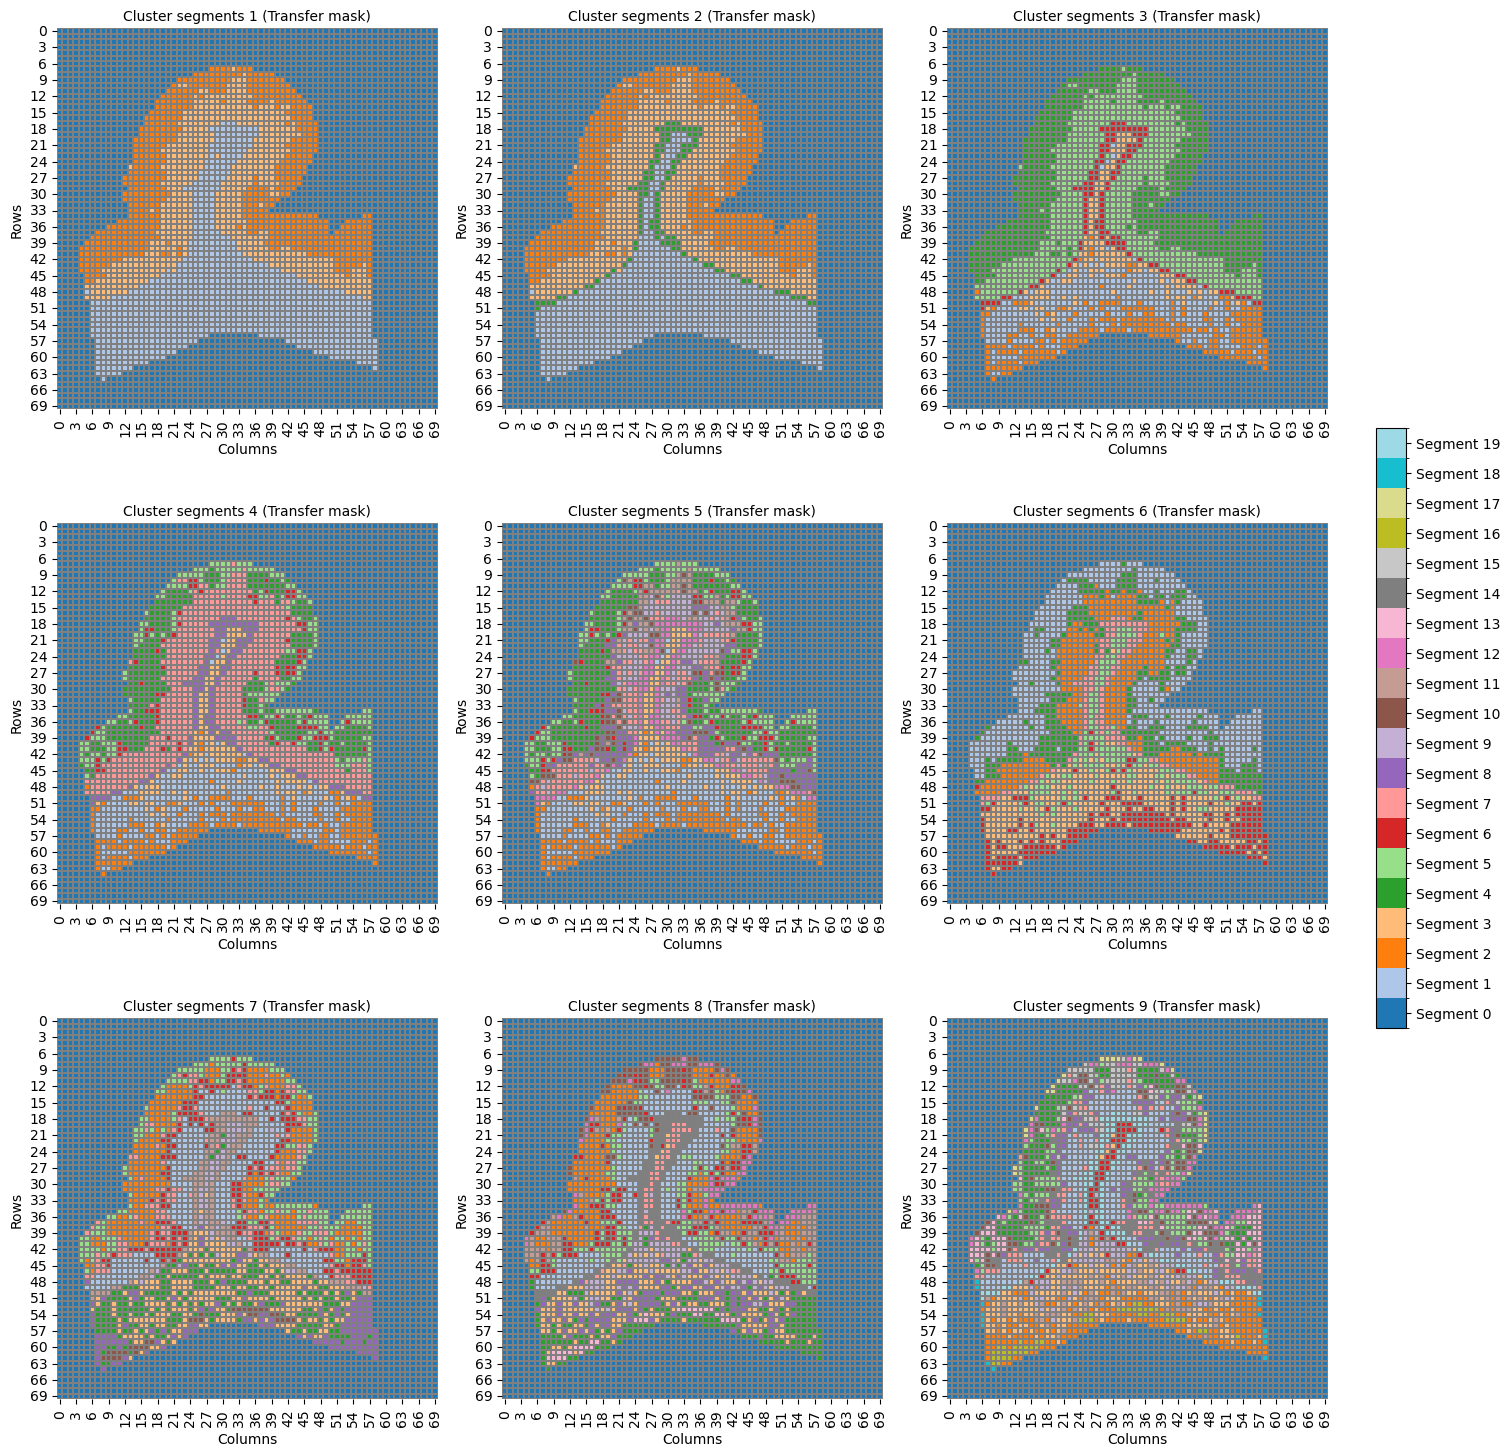

In [ ]:
a = np.array(segments).astype(int)

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Generate n_clusters distinguishable colors using a colormap (e.g., tab20)
n_clusters = 20
base_cmap = cm.get_cmap('tab20', n_clusters)  # or 'tab20b', 'Set3', 'gist_ncar'
category_colors = base_cmap(np.arange(n_clusters))
cmap = ListedColormap(category_colors)

# Define boundaries between integer classes
bounds = np.arange(n_clusters + 1) - 0.5  # from -0.5 to 19.5 (inclusive of 20 boundaries)
norm = BoundaryNorm(bounds, cmap.N)

# Plot 3x3 heatmaps
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i in range(9):
    ax = axes[i]
    hm = sns.heatmap(a[i], cmap=cmap, norm=norm, cbar=False, square=True,
                     ax=ax, linewidths=0.2, linecolor='gray')
    ax.set_title(f'Cluster segments {i+1} (Transfer mask)', fontsize=10)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Rows')

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cb = fig.colorbar(hm.get_children()[0], cax=cbar_ax, ticks=np.arange(n_clusters))

# Optional: custom class labels (replace with your actual meanings)
cb.ax.set_yticklabels([f'Segment {i}' for i in range(n_clusters)])

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


In [125]:
F2S.transfer_masks??

Signature:
F2S.transfer_masks(
    adata,
    mask,
    list_s=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'],
    RowCol=None,
)
Docstring: <no docstring>
Source:   
def transfer_masks(adata, mask, list_s=['Cluster1', 'Cluster2','Cluster3', 'Cluster4'], RowCol=None):
    segments_list = []
    for seg_index in list_s:
        transfer = np.zeros(mask.shape)
        if RowCol == None:
            xy_index = adata.obs[['x', 'y', seg_index]].copy().astype(int)
            for index in range(adata.obs.shape[0]):
                transfer[xy_index['y'][index], xy_index['x'][index]] = xy_index[seg_index][index]
        else:
            xy_index = adata.obs[['Spot_row', 'Spot_col', seg_index]].copy().astype(int)
            for index in range(adata.obs.shape[0]):
                transfer[xy_index['Spot_row'][index], xy_index['Spot_col'][index]] = xy_index[seg_index][index]            
            
        segments_list.append(transfer.astype(int).astype(str))
    
    return(segments_list)

In [138]:
# # adata.obs
# print(np.array(segments).shape)
# np.unique(np.array(segments).flatten())

for i, cluster in enumerate([f'Cluster{i}' for i in range(1, 10)]):
    print(f"{cluster}: ", adata.obs[cluster].unique())




Cluster1:  ['2', '3', '1']
Categories (3, object): ['1', '2', '3']
Cluster2:  ['2', '3', '4', '1']
Categories (4, object): ['1', '2', '3', '4']
Cluster3:  ['4', '5', '6', '3', '1', '2']
Categories (6, object): ['1', '2', '3', '4', '5', '6']
Cluster4:  ['5', '7', '4', '6', '8', '3', '1', '2']
Categories (8, object): ['1', '2', '3', '4', '5', '6', '7', '8']
Cluster5:  ['5', '11', '4', '10', '6', ..., '8', '12', '3', '1', '2']
Length: 12
Categories (12, object): ['1', '2', '3', '4', ..., '9', '10', '11', '12']
Cluster6:  ['1', '4', '2', '7', '5', '3', '6']
Categories (7, object): ['1', '2', '3', '4', '5', '6', '7']
Cluster7:  ['5', '6', '2', '7', '1', ..., '9', '4', '3', '8', '10']
Length: 11
Categories (11, object): ['1', '2', '3', '4', ..., '8', '9', '10', '11']
Cluster8:  ['10', '12', '2', '6', '5', ..., '3', '9', '4', '8', '13']
Length: 14
Categories (14, object): ['1', '2', '3', '4', ..., '11', '12', '13', '14']
Cluster9:  ['17', '15', '12', '5', '4', ..., '9', '2', '11', '18', '16']